<a href="https://www.kaggle.com/code/mohamedyosef101/how-economic-status-impact-olympics-performance?scriptVersionId=199866279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# How economic status impact Olympics performance
The goal is not to find the direct linear relation between `GDP` and `total` number of medals. Instead, I'm going to focus on which countires did best despite their "not good" economic status.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# setting the warnings to be ignored
warnings.filterwarnings('ignore') 

# customise visual style
sns.set()

# Read the dataset
PATH = '/kaggle/input/2024-olympics-medals-and-economic-status/'
df = pd.read_csv(PATH + 'olympics-economics.csv')

# Quick EDA

The goal of this quick EDA is to understand (1) the overall structure of the data, (2) where is the average, (3) the dispersion of the data values, (4) the distribution, and (5) the relationship between `GDP` per capita and `total` number of medals. 

## The overall structure of the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   gold          90 non-null     int64  
 3   silver        90 non-null     int64  
 4   bronze        90 non-null     int64  
 5   total         90 non-null     int64  
 6   gdp           90 non-null     float64
 7   gdp_year      90 non-null     int64  
 8   population    90 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 6.5+ KB


<div style="background: whitesmoke; padding: 24px 12px; font-weight: bold;">The DataFrame contains 90 rows and 9 columns. All columns have 90 non-null values, meaning <span style="color: crimson;">there are no missing data points</span>.</div>

## Summary statistics

In [3]:
df.describe()

,gold,silver,bronze,total,gdp,gdp_year,population
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000
max,40.000000,44.000000,42.000000,126.000000,103684.880000,2023.000000,1428.600000


<div style="background: whitesmoke; padding: 24px 12px; font-weight: bold;">
    <ul>
        <li> The average number of medals won is <span style="color: crimson;">around 3-4</span> for gold and silver, and slightly higher for bronze.</li> 
        <li> The total medals won are around <span style="color: crimson;">11 on average</span>.</li>
        <li> The average GDP per capita is around <span style="color: crimson;">24,478 USD</span>.</li>
            <li> The average population is around <span style="color: crimson;">69 million</span>.</li>
            <li> The standard deviation is <span style="color: crimson;">very high</span>, indicating a wide range in medals count, GDP, and population sizes.</li>
    </ul>
</div>

## Explore the distribution

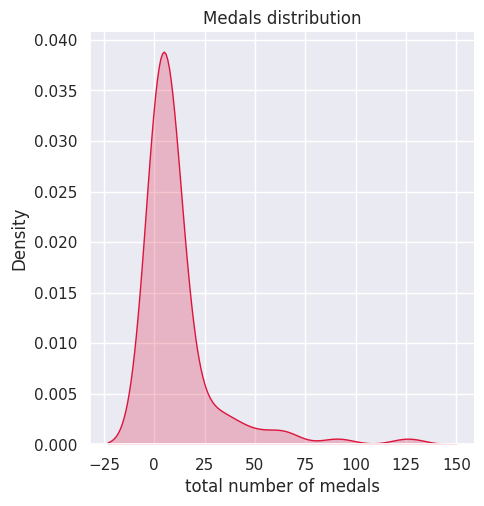

In [4]:
sns.displot(data=df, x='total', kind='kde', color='crimson', fill=True)
plt.xlabel("total number of medals")
plt.title("Medals distribution")
plt.show()

<div style="background: whitesmoke; padding: 24px 12px;">
<strong>The KDE plot shows that the distribution of total medals is <span style="color: crimson;">highly skewed</span>, with a concentration of countries around the lower end of the spectrum and a few outliers with very high medal counts</strong> <small>(e.g. US and China)</small>.
</div>

In [5]:
# drop outliers
df = df.drop(df.index[df.country_code.isin(['USA', 'CHN'])], axis=0)

## Total Medals and GDP per capita

In [6]:
# useful function
def scatter(y, ylabel):
    """A function to create a scatter plot
    Args: 
    - y (str): the column in the y-axis.
    - ylabel (str): the label of y-axis.
    """
    sns.scatterplot(x='total', y=y, data=df, color='darkcyan')
    plt.xlabel("Total number of medals")
    plt.ylabel(ylabel)
    plt.title(f"\n{ylabel} vs. Total number of medals \n", fontsize=16)
    plt.show()

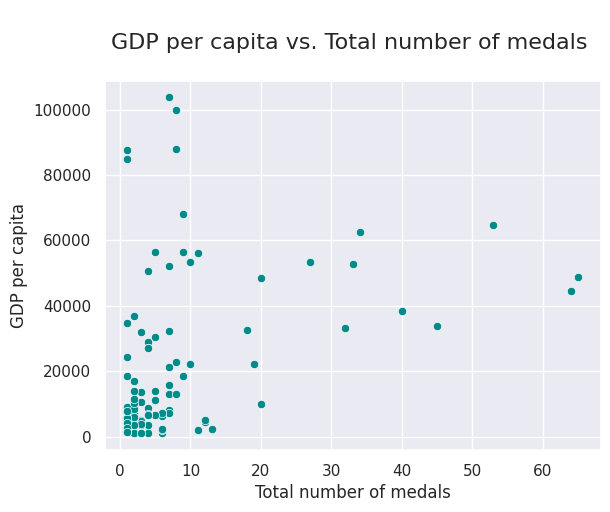

In [7]:
scatter('gdp', 'GDP per capita')

<div style="background: whitesmoke; padding: 24px 12px; font-weight: bold;">
Most countries seem clustered around lower GDP values (<span style="color: crimson;">below 20,000 USD</span>), suggesting that a large number of countries have lower economic performance, but their medal counts vary widely within this range. While some countries with high GDP (<span style="color: crimson;">above 60,000 USD</span>) still win relatively few medals, suggesting that <span style="background: crimson; color: white; padding: 2px 4px;">wealth alone doesn’t guarantee athletic success</span>.</div>

<br>

**Next Steps:** <br>
I'll explore medals per capita and medals per GDP to see if normalising this data reveals more meaningful trends, particularly among smaller or less wealthy nations.

# Data Normalisation
I'll introduce two features; `medals_per_capita` and `medals_per_gdp`. By doing so, we can move beyond raw medal counts and uncover stories about **efficiency**, **resourcefulness**, and **sports culture** in various countries.

In [8]:
df['medals_per_capita'] = round((df['total'] / df['population']), 2)
df['medals_per_gdp'] = (df['total'] / df['gdp']) * 10**4  # per 10K USD in GDP
print("Features created!")

Features created!


## Medals per GDP
Wealthier countries tend to have more resources to invest in sports infrastructure, coaching, and athlete development. By looking at medals per (10K USD) GDP, we can identify which countries are outperforming given their economic size, highlighting nations that are "punching above their weight."

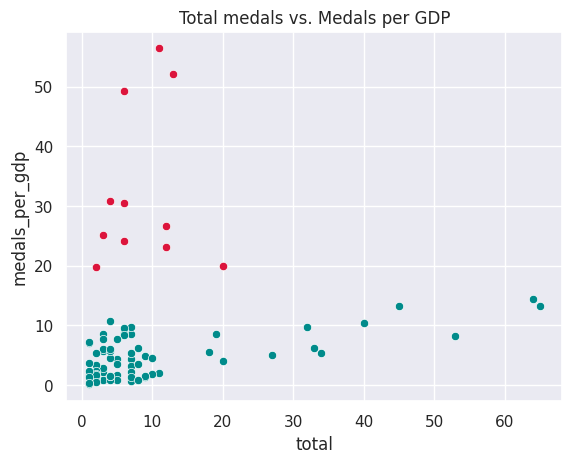

Top 3 performance: ['Uzbekistan', 'Kenya', 'North Korea']


In [9]:
sns.scatterplot(data=df, x='total', y='medals_per_gdp', color='darkcyan')
sns.scatterplot(data=df[df.medals_per_gdp > 19], x='total', y='medals_per_gdp', color='crimson')
plt.title("Total medals vs. Medals per GDP")
plt.show()
print(f"Top 3 performance: {df.country[df.medals_per_gdp > 40].tolist()}")

<div style="background: whitesmoke; padding: 24px 12px; font-weight: bold;">
All countries in red did a good performance but we can say that <span style="color: crimson;">Uzbekistan, Kenya, and North Korea</span> <span style="color: white; background: teal; padding: 2px 4px;">did a great performance</span> comparing to their economic status.</div>

<br>

The explanation below:

<Figure size 400x2000 with 0 Axes>

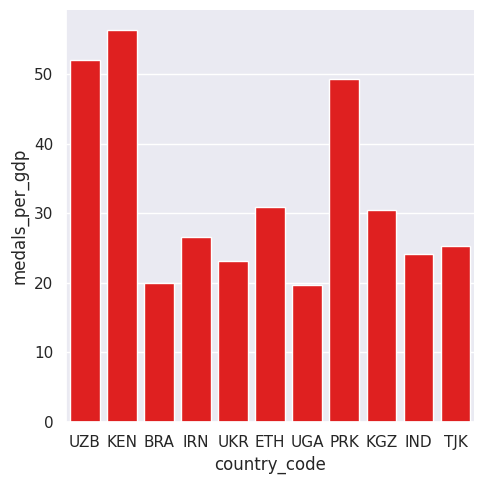

In [10]:
# all red countries
plt.figure(figsize=(4, 20))
sns.catplot(data=df[df.medals_per_gdp > 19], x='country_code', y='medals_per_gdp', kind='bar', color='red')
plt.show()

In [11]:
df[['country', 'country_code', 'medals_per_gdp']][df.medals_per_gdp > 19]

,country,country_code,medals_per_gdp
12,Uzbekistan,UZB,52.081038
16,Kenya,KEN,56.413149
19,Brazil,BRA,19.913139
20,Iran,IRN,26.651564
21,Ukraine,UKR,23.159943
46,Ethiopia,ETH,30.917157
57,Uganda,UGA,19.719782
67,North Korea,PRK,49.301561
68,Kyrgyzstan,KGZ,30.458863
70,India,IND,24.146327


---

## Medals per capita
Larger populations typically have a larger talent pool. Medals per capita help reveal which countries are more successful at turning their population into elite athletes.

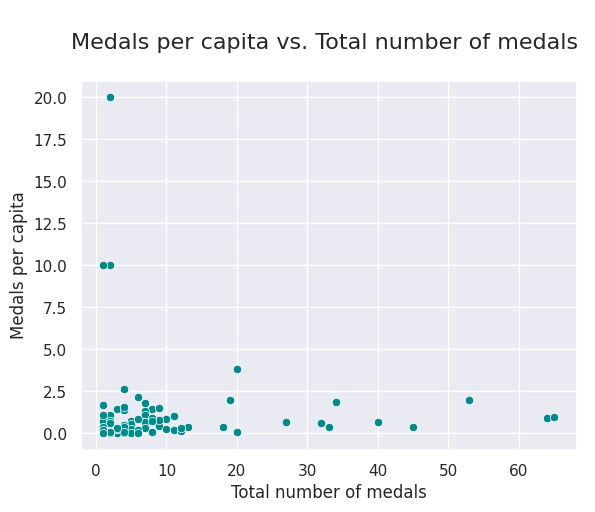

Top 3 performance: ['St Lucia', 'Dominica', 'Grenada']


In [12]:
scatter(y='medals_per_capita', ylabel='Medals per capita')
print(f"Top 3 performance: {df.country[df.medals_per_capita >= 10].tolist()}")

<div style="background: whitesmoke; padding: 24px 12px; font-weight: bold;">
The countries in the top-left corner (<span style="color: crimson;">St Lucia, Dominica, and Grenada</span>) are small nations with high medals per capita despite winning fewer total medals. This means they are highly efficient in winning medals compared to their population size, which might suggest that these countries <span style="color: white; background: teal; padding: 1px 4px;">have an exceptionally strong focus on sports</span> given their size.</div>

# Next Steps
- Build a simple regression model to predict the number of medals a country might win based on economic factors such as GDP and population. (if you find data about investment in sports, it would be awesome)
- Identify groups of countries with similar characteristics in terms of GDP, population, and medal count, and explore what distinguishes them from other clusters.
- Analyse how the performance of countries has evolved over time. Has the relationship between GDP and medals changed across different Olympic years?